Shells:
 [0.000e+00 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02 6.000e-02
 7.000e-02 8.000e-02 9.000e-02 1.000e-01 1.100e-01 1.200e-01 1.300e-01
 1.400e-01 1.500e-01 1.600e-01 2.630e+00 2.640e+00 2.680e+00 2.690e+00
 2.700e+00 2.710e+00 2.720e+00 2.730e+00 2.740e+00 2.780e+00 2.790e+00
 2.800e+00 2.820e+00 2.830e+00 2.940e+00 2.950e+00 3.270e+00 3.280e+00
 3.290e+00 3.350e+00 3.360e+00 4.160e+00 4.170e+00 4.920e+00 4.930e+00
 4.950e+00 4.960e+00 4.970e+00 4.980e+00 5.010e+00 5.020e+00 5.030e+00
 5.880e+00 5.890e+00 6.450e+00 6.470e+00 6.480e+00 6.490e+00 6.510e+00
 6.520e+00 6.530e+00 6.580e+00 6.590e+00 6.740e+00 6.770e+00 6.780e+00
 7.670e+00 7.680e+00 7.690e+00 7.700e+00 7.710e+00 7.730e+00 7.740e+00
 8.320e+00 8.330e+00 8.730e+00 8.740e+00 8.750e+00 8.760e+00 8.770e+00
 8.780e+00 8.790e+00 8.830e+00 8.950e+00 8.970e+00 8.980e+00 9.310e+00
 1.053e+01 1.054e+01 1.055e+01 1.056e+01 1.057e+01 1.058e+01 1.061e+01
 1.062e+01 1.071e+01 1.073e+01 1.074e+01 1.132e+01 1.133e+01 1.134e+

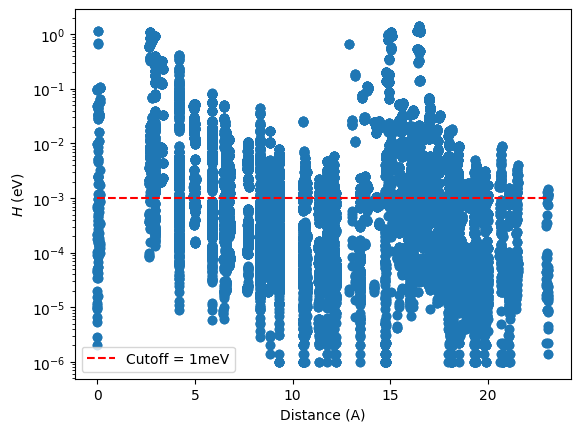

In [2]:
from pythtb import W90
import matplotlib.pyplot as plt
import numpy as np

nso = W90(".", "wannier90")

# hard coded fermi level in eV
fermi_ev = -1.065140 

# all pair distances between the orbitals
print("Shells:\n", nso.shells())

# plot hopping terms as a function of distance on a log scale
(dist, ham) = nso.dist_hop()
fig, ax = plt.subplots()
ax.scatter(dist, np.abs(ham))
ax.hlines(
    1e-3, xmin=0, xmax=max(dist), colors="r", linestyles="dashed", label="Cutoff = 1meV"
)
ax.legend()
ax.set_xlabel("Distance (A)")
ax.set_ylabel(r"$H$ (eV)")
ax.set_yscale("log")

In [3]:
# get tb model in which some small terms are ignored
my_model = nso.model(
    zero_energy=fermi_ev,
    min_hopping_norm=1e-3,
)

(w90_kpt, w90_evals, w90_k_dist, w90_k_nodes, w90_k_labels) = nso.bands_w90(
    return_k_dist=True, return_k_nodes=True
)

print("k-point labels:", w90_k_labels)
print("k-point nodes (fractional):\n", w90_k_nodes)



k-point labels: ['$\\Gamma$', '$X$', '$M$', '$Y$', '$\\Gamma$']
k-point nodes (fractional):
 [[0.  0.  0. ]
 [0.5 0.  0. ]
 [0.5 0.5 0. ]
 [0.  0.5 0. ]
 [0.  0.  0. ]]


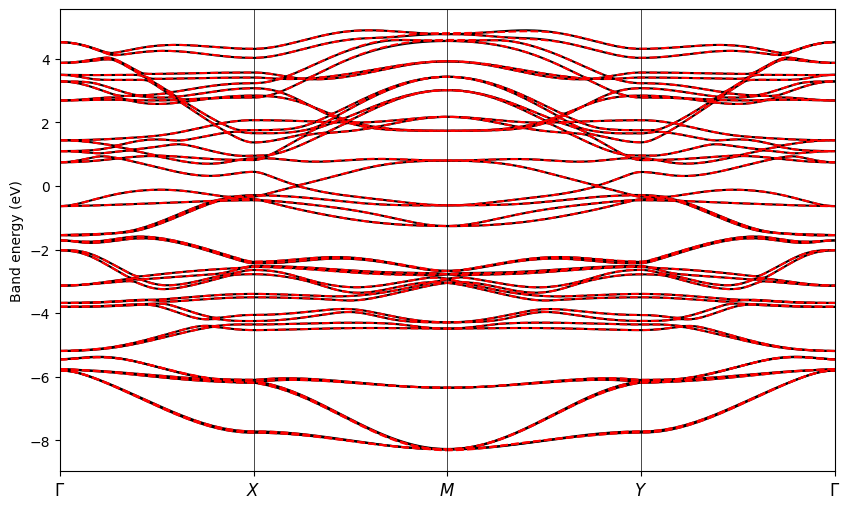

In [4]:
k_vec, k_dist, k_node_dist = my_model.k_path(w90_k_nodes, nk=500, report=False)

int_evals = my_model.solve_ham(w90_kpt)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(w90_k_dist, w90_evals[:, 0] - fermi_ev, "k-", zorder=0, label="Wannier90")
ax.plot(w90_k_dist, w90_evals[:, 1:] - fermi_ev, "k-", zorder=0)
ax.plot(w90_k_dist, int_evals[:, 0], "r--", zorder=1, label="TBModel")
ax.plot(w90_k_dist, int_evals[:, 1:], "r--", zorder=1)

# set x-ticks at k-point nodes
ax.set_xticks(k_node_dist)
for n in range(len(w90_k_nodes)):
    ax.axvline(x=k_node_dist[n], linewidth=0.5, color="k", zorder=1)
ax.set_xticklabels(w90_k_labels, size=12)
ax.set_xlim(k_node_dist[0], k_node_dist[-1])
ax.set_ylabel("Band energy (eV)")
plt.show()

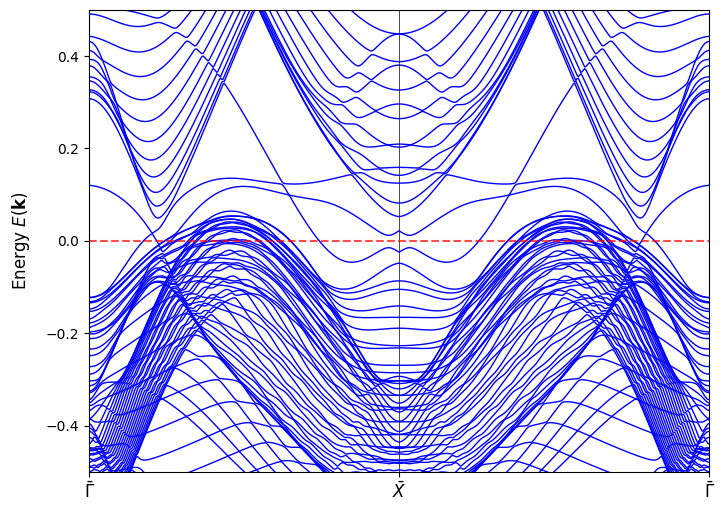

In [ ]:
#新模型，边缘态能谱的计算

fin_model = my_model.make_finite(periodic_dirs=[0], num_cells=[26])

#k_nodes = [[0, 0], [0.5, 0], [0.5, 0.5], [0, 0.5], [0, 0.0]]  # G X M Y G
k_nodes = [[0, 0], [0.5, 0], [0, 0]]
k_labels = [
    r"$\bar{\Gamma}$",
    r"$\bar{X}$",
    r"$\bar{\Gamma}$",
]

fig, ax = plt.subplots(figsize=(8, 6))
fin_model.plot_bands(
    k_nodes=k_nodes, k_node_labels=k_labels, lw=1, nk=500, fig=fig, ax=ax
)

#ax.axhline(y=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7, 
#        label=r'$E_F$ (Fermi level)')
ax.set_ylim(-0.5, 0.5)

plt.show()
fig.savefig(
    "edge_band.png",
    dpi=300,
    bbox_inches="tight"
)

Font 'default' does not have a glyph for '\u6cbf' [U+6cbf], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u65b9' [U+65b9], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5411' [U+5411], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6cbf' [U+6cbf], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u65b9' [U+65b9], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5411' [U+5411], substituting with a dummy symbol.


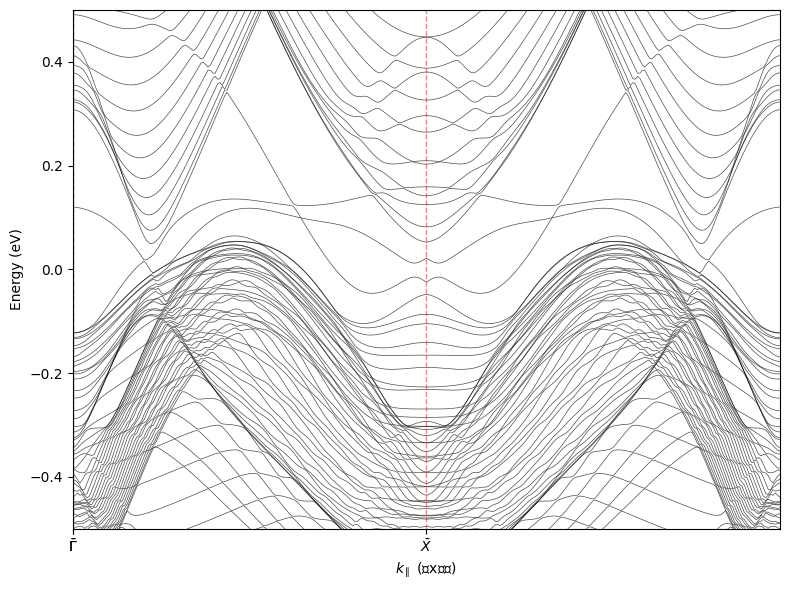

In [14]:
# 创建有限模型：x方向周期性，y方向开边界（26个原胞）
fin_model = my_model.make_finite(periodic_dirs=[0], num_cells=[26])

# 定义x方向的k路径：Γ → X → Γ
# 由于y方向是开边界，所以ky分量设为0
k_points = [
    [0, 0],     # Γ点
    [0.5, 0],   # X点
    [0, 0]      # 返回Γ点
]

# 在路径上采样
nk_segment = 150  # 每段路径的采样点数
nk_total = 2 * nk_segment  # 总点数（两段）

# 生成路径上的k点
k_path = []
k_labels = []  # 用于标记高对称点
segment_lengths = []  # 每段路径的长度

# 第一段：Γ → X
for i in range(nk_segment):
    # 线性插值
    t = i / (nk_segment - 1)
    kx = (1 - t) * k_points[0][0] + t * k_points[1][0]
    ky = (1 - t) * k_points[0][1] + t * k_points[1][1]
    k_path.append([kx, ky])

# 第二段：X → Γ
for i in range(nk_segment):
    t = i / (nk_segment - 1)
    kx = (1 - t) * k_points[1][0] + t * k_points[2][0]
    ky = (1 - t) * k_points[1][1] + t * k_points[2][1]
    k_path.append([kx, ky])

# 计算k点路径的距离坐标（用于绘图x轴）
k_path_array = np.array(k_path)
k_dist = [0]  # 距离坐标从0开始

# 计算累积距离
for i in range(1, len(k_path)):
    # 两点之间的欧几里得距离
    dk = k_path_array[i] - k_path_array[i-1]
    dist = np.sqrt(np.sum(dk**2))
    k_dist.append(k_dist[-1] + dist)

k_dist = np.array(k_dist)

# 计算能带
bands = []
for k in k_path:
    # 注意：y方向是开边界，所以ky分量应该设为0
    # 但为了通用性，我们保留ky分量
    evals = fin_model.solve_ham(k)
    bands.append(evals)

bands = np.array(bands)  # shape: (nk_total, n_bands)

# 高对称点在距离坐标中的位置
k_node_positions = []
for k in k_points:
    # 找到路径上最近的k点位置
    k_array = np.array(k)
    distances = np.sqrt(np.sum((k_path_array - k_array)**2, axis=1))
    idx = np.argmin(distances)
    k_node_positions.append(k_dist[idx])

# 高对称点标签
k_node_labels = [
    r"$\bar{\Gamma}$",
    r"$\bar{X}$",
    r"$\bar{\Gamma}$"
]

# 绘制能带
fig, ax = plt.subplots(figsize=(8, 6))

# 绘制所有能带
for n in range(bands.shape[1]):
    ax.plot(k_dist, bands[:, n], color="k", lw=0.5, alpha=0.7)

# 标记高对称点
for pos, label in zip(k_node_positions, k_node_labels):
    ax.axvline(x=pos, color="red", linestyle="--", alpha=0.5, lw=1)

# 设置x轴
ax.set_xticks(k_node_positions)
ax.set_xticklabels([r"$\bar{\Gamma}$", r"$\bar{X}$", r"$\bar{\Gamma}$"])

# 设置y轴
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(k_dist[0], k_dist[-1])
ax.set_xlabel(r"$k_\parallel$ (沿x方向)")
ax.set_ylabel("Energy (eV)")

plt.tight_layout()
plt.show()

# 可选：保存数据
# np.save("edge_bands_gamma_X_gamma.npy", bands)
# np.save("k_dist_gamma_X_gamma.npy", k_dist)
# np.save("k_path_gamma_X_gamma.npy", k_path_array)

In [22]:
#有限体系下的边缘态波函数图
#fin_model = my_model.make_finite(
#    periodic_dirs=[0, 1], num_cells=[10, 10], glue_edges=[False, False]
#)
fin_model = my_model.make_finite(
    periodic_dirs=[0, 1], num_cells=[3, 3], glue_edges=[True, False]
)
(evals, evecs) = fin_model.solve_ham(return_eigvecs=True)
print("Number of states:", len(evals))




ValueError: k_pts must be specified for periodic systems (dim_k > 0).

In [ ]:
# 可视化
(fig, ax) = fin_model_half.visualize(
    proj_plane=[0, 1], eig_dr=evecs_half[ed, :], draw_hoppings=False
)
ax.set_title("Edge state for finite model periodic in one direction")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
fig.tight_layout()
plt.show()

In [1]:
# -*- coding: utf-8 -*-
"""
Fit symmetry-based TB parameters (e/t/r) against Wannier band reference (wannier90_band.dat)

Stages:
  Stage-1: fit e only
  Stage-2: fit t only (e fixed)
  Stage-3: fit r only (e,t fixed)
  Stage-4: fit e,t,r together (warm start from stage1-3)

Band-matching protection (recommended):
  Stage-4 uses eigenvector-overlap band tracking + Hungarian anchoring at kref_match,
  to mitigate band crossings / index swapping issues.

Windows-ready. Target band set is fixed by reference band indices selected at kref.
"""

import os
import numpy as np
from scipy.optimize import least_squares, linear_sum_assignment

# Wolfram WXF deserializer (needs: pip install wolframclient)
from wolframclient.deserializers import binary_deserialize
from wolframclient.language.expression import WLFunction, WLSymbol


# ============================================================
# 0) Config (EDIT PATHS HERE)
# ============================================================
TB_FILE = r"E:\马睿骁\组会汇报\Nb2OSSe\pythTB\tb_basis.wxf"
WANNIER_BAND_FILE = r"E:\马睿骁\组会汇报\Nb2OSSe\pythTB\wannier90_band.dat"

# Optional: for cross validation (DFT BAND.dat from VASPKIT)
DFT_BAND_FILE = None  # r"E:\...\BAND.dat"

# DFT Fermi energy baseline: you said "use DFT EF=0"
EF_DFT = 0.0
EF_SHIFT_WANNIER = 0.0

# Select 12 bands: fixed band indices (global columns)
N_TARGET_BANDS = 12
KREF_FOR_PICK = 0  # select target bands at this ref index in reference bands
E_TARGET = 0.0

# Regularization (keeps parameters from exploding)
LAMBDA_E = 1e-8
LAMBDA_T = 1e-8
LAMBDA_R = 1e-8

# Bounds (typical low-energy window)
E_BOUND = 5.0
T_BOUND = 2.5
R_BOUND = 2.5

# Optimizer controls
MAX_NFEV_1 = 2000
MAX_NFEV_2 = 3000
MAX_NFEV_3 = 3000
MAX_NFEV_4 = 6000

DIFF_STEP = 1e-3

# Stage-4 band-matching protection (HIGHLY recommended)
USE_BANDMATCH_STAGE4 = True
KREF_MATCH = KREF_FOR_PICK  # anchor for Hungarian matching + tracking


# ============================================================
# 1) Wolfram expression -> Python number
# ============================================================
def _head_name(h):
    return h.name if isinstance(h, WLSymbol) else str(h)

def wl_to_number(x):
    if isinstance(x, np.generic):
        x = x.item()
    if isinstance(x, (int, float, complex, np.number)):
        return x
    if isinstance(x, (list, tuple)):
        # Some WXF encodes Complex as [re, im]
        if len(x) == 2:
            return complex(float(wl_to_number(x[0])), float(wl_to_number(x[1])))
        if len(x) == 1:
            return wl_to_number(x[0])
    if isinstance(x, WLFunction):
        name = _head_name(x.head)
        args = list(x.args)
        if name == "Complex":
            return complex(wl_to_number(args[0]), wl_to_number(args[1]))
        if name == "Rational":
            return float(wl_to_number(args[0])) / float(wl_to_number(args[1]))
        if name == "Plus":
            return sum(wl_to_number(a) for a in args)
        if name == "Times":
            out = 1
            for a in args:
                out *= wl_to_number(a)
            return out
        if name == "Power":
            return wl_to_number(args[0]) ** wl_to_number(args[1])
        raise TypeError(f"Unsupported WLFunction: {name}")
    # fallback
    return complex(x)

def mat_to_complex_array(mat, nb):
    out = np.empty((nb, nb), dtype=np.complex128)
    for i in range(nb):
        for j in range(nb):
            out[i, j] = wl_to_number(mat[i][j])
    return out


# ============================================================
# 2) Load TB basis from WXF
# ============================================================
def load_tb_basis_wxf(filename, debug=False):
    if not os.path.exists(filename):
        raise FileNotFoundError(f"TB WXF not found: {filename}")

    with open(filename, "rb") as f:
        expr = binary_deserialize(f)

    pars = np.array([str(p) for p in expr["pars"]])
    kpts = np.array(expr["kpts"], dtype=float)  # (Nk,2) or (Nk,3) depending on export
    H0k_raw = expr["H0k"]
    Hbk_raw = expr["Hbk"]

    Nk = len(H0k_raw)
    nb = len(H0k_raw[0])
    Np = len(pars)

    H0k = np.empty((Nk, nb, nb), dtype=np.complex128)
    Hbk = np.empty((Nk, Np, nb, nb), dtype=np.complex128)

    for ik in range(Nk):
        H0k[ik] = mat_to_complex_array(H0k_raw[ik], nb)
        for jp in range(Np):
            Hbk[ik, jp] = mat_to_complex_array(Hbk_raw[ik][jp], nb)

    # Hermitian safety
    H0k = (H0k + H0k.transpose(0, 2, 1).conj()) / 2.0
    Hbk = (Hbk + Hbk.transpose(0, 1, 3, 2).conj()) / 2.0

    if debug:
        print(f"[TB] Nk={Nk}, nb={nb}, Nparams={Np}")
        print("kpts[0:3]:", kpts[:3])

    return pars, kpts, H0k, Hbk


# ============================================================
# 3) Parse wannier90_band.dat
#    Format: two columns (kdist, energy), bands separated by blank lines
# ============================================================
def load_wannier_banddat(filename, ef_shift=0.0, debug=False):
    if not os.path.exists(filename):
        raise FileNotFoundError(f"Wannier band file not found: {filename}")

    blocks, buf = [], []
    with open(filename, "r") as f:
        for line in f:
            s = line.strip()
            if (not s) or s.startswith("#"):
                if buf:
                    blocks.append(np.array(buf, dtype=float))
                    buf = []
                continue
            parts = s.split()
            if len(parts) < 2:
                continue
            kd = float(parts[0])
            en = float(parts[1]) - ef_shift
            buf.append([kd, en])
    if buf:
        blocks.append(np.array(buf, dtype=float))

    if len(blocks) == 0:
        raise ValueError("No band blocks parsed from wannier90_band.dat")

    Nk = len(blocks[0])
    kdist = blocks[0][:, 0]
    bands = []
    for b in blocks:
        if len(b) != Nk:
            continue
        bands.append(b[:, 1])
    Eall = np.stack(bands, axis=1)  # (Nk, Nb_total)

    if debug:
        print(f"[WANNIER] Nk={Nk}, Nb_total={Eall.shape[1]}")
        print("kdist[0:3]:", kdist[:3])
        print("E range (min,max):", float(Eall.min()), float(Eall.max()))

    return kdist, Eall


# ============================================================
# 4) Optional: Parse VASPKIT BAND.dat (band blocks)
# ============================================================
def load_vaspkit_banddat_auto(filename, ef):
    blocks, buf = [], []
    with open(filename, "r") as f:
        for line in f:
            s = line.strip()
            if (not s) or s.startswith("#"):
                if buf:
                    blocks.append(np.array(buf, dtype=float))
                    buf = []
                continue
            a, b = s.split()[:2]
            buf.append([float(a), float(b) - ef])
    if buf:
        blocks.append(np.array(buf, dtype=float))

    Nk = len(blocks[0])
    kdist = blocks[0][:, 0]
    bands = [b[:, 1] for b in blocks if len(b) == Nk]
    Eall = np.stack(bands, axis=1)  # (Nk, Nb_total)
    return kdist, Eall


# ============================================================
# 5) Fixed band index selection (global 12 columns)
# ============================================================
def pick_fixed_band_indices(Eall, n=12, kref=0, target=0.0):
    if kref < 0 or kref >= Eall.shape[0]:
        raise ValueError("kref out of range")
    e0 = Eall[kref, :]
    order = np.argsort(np.abs(e0 - target))
    chosen = np.sort(order[:n])  # keep stable band order by index
    return chosen

def select_bands_fixed_order(Eall, indices):
    return Eall[:, indices]


# ============================================================
# 6) kdist utilities
# ============================================================
def kdist_from_kpts(kpts):
    kpts = np.asarray(kpts, dtype=float)
    dk = np.linalg.norm(np.diff(kpts, axis=0), axis=1)
    kd = np.concatenate([[0.0], np.cumsum(dk)])
    return kd

def rescale_kdist(kd_tb, kd_ref):
    if kd_tb[-1] == 0:
        return kd_tb.copy()
    return kd_tb * (kd_ref[-1] / kd_tb[-1])

def make_unique_monotonic(x, Y):
    """
    For duplicate x (common at high symmetry joints):
    - average Y for identical x
    - return strictly monotonic x
    """
    x = np.asarray(x)
    Y = np.asarray(Y)
    ux, inv = np.unique(x, return_inverse=True)
    Y2 = np.zeros((len(ux),) + Y.shape[1:], dtype=float)
    cnt = np.zeros(len(ux), dtype=int)
    for i, g in enumerate(inv):
        Y2[g] += Y[i]
        cnt[g] += 1
    if Y2.ndim == 1:
        Y2 = Y2 / cnt
    else:
        Y2 = Y2 / cnt.reshape(-1, *([1] * (Y2.ndim - 1)))
    return ux, Y2


# ============================================================
# 7) TB eigenvalues (simple: energy-sorted at each k)
# ============================================================
def tb_bands_allk(H0k, Hbk, p_full):
    Nk = H0k.shape[0]
    nb = H0k.shape[1]
    E = np.empty((Nk, nb), dtype=float)
    for ik in range(Nk):
        H = H0k[ik] + np.tensordot(p_full, Hbk[ik], axes=(0, 0))
        H = (H + H.conj().T) / 2.0
        E[ik] = np.linalg.eigvalsh(H).real  # ascending
    return E


# ============================================================
# 8) TB eigenvalues with band-matching protection (tracking)
# ============================================================
def tb_bands_allk_tracked(H0k, Hbk, p_full, Eref_k0=None, kref_match=0):
    """
    Compute TB eigenvalues on all k points, with band-order tracking protection.

    Steps:
      A) At kref_match: align TB band order to reference Eref_k0 by energy matching (Hungarian).
      B) Track forward/backward by maximizing eigenvector overlaps.

    Returns:
      E_tracked: (Nk, nb) float, energies in a consistent tracked order.
    """
    Nk = H0k.shape[0]
    nb = H0k.shape[1]

    # solve eigensystem at all k
    evals = np.empty((Nk, nb), dtype=float)
    evecs = np.empty((Nk, nb, nb), dtype=np.complex128)  # columns are eigenvectors
    for ik in range(Nk):
        H = H0k[ik] + np.tensordot(p_full, Hbk[ik], axes=(0, 0))
        H = (H + H.conj().T) / 2.0
        w, v = np.linalg.eigh(H)  # ascending w; v columns are eigenvectors
        evals[ik] = w.real
        evecs[ik] = v

    perm = np.zeros((Nk, nb), dtype=int)

    # anchor matching at kref_match
    if Eref_k0 is None:
        perm[kref_match] = np.arange(nb, dtype=int)
    else:
        tb0 = evals[kref_match]
        ref0 = np.asarray(Eref_k0, dtype=float)
        if ref0.shape[0] != nb:
            raise ValueError(f"Eref_k0 length {ref0.shape[0]} != nb {nb}")

        C = (tb0[:, None] - ref0[None, :]) ** 2
        row_ind, col_ind = linear_sum_assignment(C)  # minimize cost
        # want mapping tracked(ref index) -> tb eigen-index
        ref_to_tb = np.zeros(nb, dtype=int)
        ref_to_tb[col_ind] = row_ind
        perm[kref_match] = ref_to_tb

    def match_by_overlap(v_prev, v_cur, prev_map):
        # v_prev, v_cur: (nb, nb), columns are eigenvectors
        Vp = v_prev[:, prev_map]  # columns in tracked order
        Vc = v_cur
        O = np.abs(Vp.conj().T @ Vc) ** 2  # (nb, nb)
        cost = 1.0 - O  # maximize overlap
        row_ind, col_ind = linear_sum_assignment(cost)
        cur_map = np.zeros(nb, dtype=int)
        cur_map[row_ind] = col_ind
        return cur_map

    # forward
    for ik in range(kref_match + 1, Nk):
        perm[ik] = match_by_overlap(evecs[ik - 1], evecs[ik], perm[ik - 1])

    # backward
    for ik in range(kref_match - 1, -1, -1):
        perm[ik] = match_by_overlap(evecs[ik + 1], evecs[ik], perm[ik + 1])

    E_tracked = np.empty_like(evals)
    for ik in range(Nk):
        E_tracked[ik] = evals[ik, perm[ik]]

    return E_tracked


# ============================================================
# 9) Residual builders (kdist-aligned)
# ============================================================
def residual_kdist_align_fixed_order(p_var, pars, kpts, H0k, Hbk,
                                    kd_ref, Eref,
                                    idx_e, idx_t, idx_r,
                                    e_fixed=None, t_fixed=None, r_fixed=None,
                                    lam=0.0,
                                    fit_mask=("e", "t", "r")):
    """
    Fixed-order residual: assumes energy-sorted eigenvalues at each k already correspond to Eref order.
    """
    Np = len(pars)
    p_full = np.zeros(Np, dtype=float)

    if e_fixed is not None:
        p_full[idx_e] = e_fixed
    if t_fixed is not None:
        p_full[idx_t] = t_fixed
    if r_fixed is not None:
        p_full[idx_r] = r_fixed

    cursor = 0
    if "e" in fit_mask:
        p_full[idx_e] = p_var[cursor: cursor + len(idx_e)]
        cursor += len(idx_e)
    if "t" in fit_mask:
        p_full[idx_t] = p_var[cursor: cursor + len(idx_t)]
        cursor += len(idx_t)
    if "r" in fit_mask:
        p_full[idx_r] = p_var[cursor: cursor + len(idx_r)]
        cursor += len(idx_r)

    E_tb = tb_bands_allk(H0k, Hbk, p_full)
    kd_tb = rescale_kdist(kdist_from_kpts(kpts), kd_ref)

    kd_tb_u, E_tb_u = make_unique_monotonic(kd_tb, E_tb)
    kd_ref_u, Eref_u = make_unique_monotonic(kd_ref, Eref)

    E_tb_on_ref = np.empty_like(Eref_u)
    for n in range(Eref_u.shape[1]):
        E_tb_on_ref[:, n] = np.interp(kd_ref_u, kd_tb_u, E_tb_u[:, n])

    res = (E_tb_on_ref - Eref_u).ravel()

    if lam and lam > 0:
        res = np.concatenate([res, np.sqrt(lam) * p_var])

    return res


def residual_kdist_align_bandmatch(p_var, pars, kpts, H0k, Hbk,
                                  kd_ref, Eref,
                                  idx_e, idx_t, idx_r,
                                  e_fixed=None, t_fixed=None, r_fixed=None,
                                  lam=0.0,
                                  fit_mask=("e", "t", "r"),
                                  kref_match=0):
    """
    Band-matching protected residual:
      - Hungarian energy matching at kref_match to align TB band order to Eref
      - eigenvector-overlap tracking along k to avoid band-index swapping
    """
    Np = len(pars)
    p_full = np.zeros(Np, dtype=float)

    if e_fixed is not None:
        p_full[idx_e] = e_fixed
    if t_fixed is not None:
        p_full[idx_t] = t_fixed
    if r_fixed is not None:
        p_full[idx_r] = r_fixed

    cursor = 0
    if "e" in fit_mask:
        p_full[idx_e] = p_var[cursor: cursor + len(idx_e)]
        cursor += len(idx_e)
    if "t" in fit_mask:
        p_full[idx_t] = p_var[cursor: cursor + len(idx_t)]
        cursor += len(idx_t)
    if "r" in fit_mask:
        p_full[idx_r] = p_var[cursor: cursor + len(idx_r)]
        cursor += len(idx_r)

    # Anchor energies at kref_match from reference bands (assumes consistent k-path ordering)
    Eref_anchor = np.asarray(Eref[kref_match], dtype=float).copy()

    E_tb = tb_bands_allk_tracked(H0k, Hbk, p_full, Eref_k0=Eref_anchor, kref_match=kref_match)

    kd_tb = rescale_kdist(kdist_from_kpts(kpts), kd_ref)

    kd_tb_u, E_tb_u = make_unique_monotonic(kd_tb, E_tb)
    kd_ref_u, Eref_u = make_unique_monotonic(kd_ref, Eref)

    E_tb_on_ref = np.empty_like(Eref_u)
    for n in range(Eref_u.shape[1]):
        E_tb_on_ref[:, n] = np.interp(kd_ref_u, kd_tb_u, E_tb_u[:, n])

    res = (E_tb_on_ref - Eref_u).ravel()

    if lam and lam > 0:
        res = np.concatenate([res, np.sqrt(lam) * p_var])

    return res


# ============================================================
# 10) IO helpers
# ============================================================
def save_params_txt(filename, pars, idx_list, values):
    with open(filename, "w", encoding="utf-8") as f:
        for idx, val in zip(idx_list, values):
            f.write(f"{pars[idx]}  {val:.10f}\n")


# ============================================================
# 11) Main Stage1-4
# ============================================================
def main():
    # ---------- Load TB basis ----------
    pars, kpts, H0k, Hbk = load_tb_basis_wxf(TB_FILE, debug=True)
    nb = H0k.shape[1]
    print(f"[TB] nb = {nb} (your TB model size)")

    # param indices
    idx_e = np.where(np.char.startswith(pars, "e"))[0]
    idx_t = np.where(np.char.startswith(pars, "t"))[0]
    idx_r = np.where(np.char.startswith(pars, "r"))[0]
    print(f"# e params = {len(idx_e)}")
    print(f"# t params = {len(idx_t)}")
    print(f"# r params = {len(idx_r)}")
    if nb != N_TARGET_BANDS:
        print(f"WARNING: TB nb={nb} but N_TARGET_BANDS={N_TARGET_BANDS}. "
              f"Your TB model should be 12-band if you fit 12 bands.")

    # ---------- Load Wannier reference ----------
    kd_w, Eall_w = load_wannier_banddat(WANNIER_BAND_FILE, ef_shift=EF_SHIFT_WANNIER, debug=True)
    print("Eall_w shape:", Eall_w.shape)

    # ---------- Pick fixed 12 band indices ----------
    fixed_indices = pick_fixed_band_indices(Eall_w, n=N_TARGET_BANDS, kref=KREF_FOR_PICK, target=E_TARGET)
    print("Fixed band indices (0-based):", fixed_indices.tolist())
    print("Fixed band indices (1-based):", (fixed_indices + 1).tolist())
    Eref = select_bands_fixed_order(Eall_w, fixed_indices)  # (Nk_ref, 12)

    # ---------- Bounds ----------
    lb_e = -E_BOUND * np.ones(len(idx_e))
    ub_e = +E_BOUND * np.ones(len(idx_e))
    lb_t = -T_BOUND * np.ones(len(idx_t))
    ub_t = +T_BOUND * np.ones(len(idx_t))
    lb_r = -R_BOUND * np.ones(len(idx_r))
    ub_r = +R_BOUND * np.ones(len(idx_r))

    # ---------- Stage-1: fit e only ----------
    print("\n===== Stage-1: fitting e only (Wannier ref) =====")
    p0_e = np.zeros(len(idx_e), dtype=float)
    res1 = least_squares(
        residual_kdist_align_fixed_order,
        p0_e,
        bounds=(lb_e, ub_e),
        args=(pars, kpts, H0k, Hbk, kd_w, Eref, idx_e, idx_t, idx_r,
              None, np.zeros(len(idx_t)), np.zeros(len(idx_r)),
              LAMBDA_E, ("e",)),
        method="trf",
        loss="linear",
        x_scale="jac",
        diff_step=DIFF_STEP,
        verbose=2,
        max_nfev=MAX_NFEV_1
    )
    e_fit = res1.x.copy()
    save_params_txt("fitted_stage1_e_wannier.txt", pars, idx_e, e_fit)
    print("Stage-1 cost =", res1.cost)
    print("Saved: fitted_stage1_e_wannier.txt")

    # ---------- Stage-2: fit t only (e fixed) ----------
    print("\n===== Stage-2: fitting t only (e fixed, Wannier ref) =====")
    p0_t = np.zeros(len(idx_t), dtype=float)
    res2 = least_squares(
        residual_kdist_align_fixed_order,
        p0_t,
        bounds=(lb_t, ub_t),
        args=(pars, kpts, H0k, Hbk, kd_w, Eref, idx_e, idx_t, idx_r,
              e_fit, None, np.zeros(len(idx_r)),
              LAMBDA_T, ("t",)),
        method="trf",
        loss="linear",
        x_scale="jac",
        diff_step=DIFF_STEP,
        verbose=2,
        max_nfev=MAX_NFEV_2
    )
    t_fit = res2.x.copy()
    save_params_txt("fitted_stage2_t_wannier.txt", pars, idx_t, t_fit)
    print("Stage-2 cost =", res2.cost)
    print("Saved: fitted_stage2_t_wannier.txt")

    # ---------- Stage-3: fit r only (e,t fixed) ----------
    print("\n===== Stage-3: fitting r only (e,t fixed, Wannier ref) =====")
    p0_r = np.zeros(len(idx_r), dtype=float)
    res3 = least_squares(
        residual_kdist_align_fixed_order,
        p0_r,
        bounds=(lb_r, ub_r),
        args=(pars, kpts, H0k, Hbk, kd_w, Eref, idx_e, idx_t, idx_r,
              e_fit, t_fit, None,
              LAMBDA_R, ("r",)),
        method="trf",
        loss="linear",
        x_scale="jac",
        diff_step=DIFF_STEP,
        verbose=2,
        max_nfev=MAX_NFEV_3
    )
    r_fit = res3.x.copy()
    save_params_txt("fitted_stage3_r_wannier.txt", pars, idx_r, r_fit)
    print("Stage-3 cost =", res3.cost)
    print("Saved: fitted_stage3_r_wannier.txt")

    # ---------- Stage-4: fit e,t,r together (warm start) ----------
    print("\n===== Stage-4: fitting e,t,r together (warm start, Wannier ref) =====")
    p0_etr = np.concatenate([e_fit, t_fit, r_fit], axis=0)
    lb_etr = np.concatenate([lb_e, lb_t, lb_r], axis=0)
    ub_etr = np.concatenate([ub_e, ub_t, ub_r], axis=0)

    lam_etr = 1e-8

    if USE_BANDMATCH_STAGE4:
        print(f"[Stage-4] Using band-matching protection (kref_match={KREF_MATCH})")
        res4 = least_squares(
            residual_kdist_align_bandmatch,
            p0_etr,
            bounds=(lb_etr, ub_etr),
            args=(pars, kpts, H0k, Hbk, kd_w, Eref, idx_e, idx_t, idx_r,
                  None, None, None,
                  lam_etr, ("e", "t", "r"),
                  KREF_MATCH),
            method="trf",
            loss="linear",
            x_scale="jac",
            diff_step=DIFF_STEP,
            verbose=2,
            max_nfev=MAX_NFEV_4
        )
    else:
        print("[Stage-4] Using fixed-order residual (no band-matching)")
        res4 = least_squares(
            residual_kdist_align_fixed_order,
            p0_etr,
            bounds=(lb_etr, ub_etr),
            args=(pars, kpts, H0k, Hbk, kd_w, Eref, idx_e, idx_t, idx_r,
                  None, None, None,
                  lam_etr, ("e", "t", "r")),
            method="trf",
            loss="linear",
            x_scale="jac",
            diff_step=DIFF_STEP,
            verbose=2,
            max_nfev=MAX_NFEV_4
        )

    etr_fit = res4.x.copy()
    e4 = etr_fit[:len(idx_e)]
    t4 = etr_fit[len(idx_e):len(idx_e) + len(idx_t)]
    r4 = etr_fit[len(idx_e) + len(idx_t):]

    save_params_txt("fitted_stage4_etr_wannier_e.txt", pars, idx_e, e4)
    save_params_txt("fitted_stage4_etr_wannier_t.txt", pars, idx_t, t4)
    save_params_txt("fitted_stage4_etr_wannier_r.txt", pars, idx_r, r4)
    print("Stage-4 cost =", res4.cost)
    print("Saved: fitted_stage4_etr_wannier_[e/t/r].txt")

    # ---------- Optional: Cross validation on DFT BAND.dat ----------
    if DFT_BAND_FILE is not None and os.path.exists(DFT_BAND_FILE):
        print("\n===== Cross validation on DFT BAND.dat (no refit) =====")
        kd_d, Eall_d = load_vaspkit_banddat_auto(DFT_BAND_FILE, EF_DFT)
        dft_indices = pick_fixed_band_indices(Eall_d, n=N_TARGET_BANDS, kref=KREF_FOR_PICK, target=0.0)
        Eref_d = select_bands_fixed_order(Eall_d, dft_indices)

        p_full = np.zeros(len(pars))
        p_full[idx_e] = e4
        p_full[idx_t] = t4
        p_full[idx_r] = r4

        if USE_BANDMATCH_STAGE4:
            # band tracking for evaluation as well (anchor to DFT at kref)
            E_tb = tb_bands_allk_tracked(H0k, Hbk, p_full, Eref_k0=Eref_d[KREF_MATCH], kref_match=KREF_MATCH)
        else:
            E_tb = tb_bands_allk(H0k, Hbk, p_full)

        kd_tb = rescale_kdist(kdist_from_kpts(kpts), kd_d)
        kd_tb_u, E_tb_u = make_unique_monotonic(kd_tb, E_tb)
        kd_d_u, Eref_d_u = make_unique_monotonic(kd_d, Eref_d)

        E_tb_on_d = np.empty_like(Eref_d_u)
        for n in range(Eref_d_u.shape[1]):
            E_tb_on_d[:, n] = np.interp(kd_d_u, kd_tb_u, E_tb_u[:, n])

        rms = np.sqrt(np.mean((E_tb_on_d - Eref_d_u) ** 2))
        print(f"DFT RMS error (eV) = {rms:.6f}")
        print("NOTE: DFT band indices used (1-based):", (dft_indices + 1).tolist())

    print("\nDONE.")


if __name__ == "__main__":
    main()


c:\ProgramData\Miniconda3\envs\pythtb\Lib\importlib\__init__.py:90: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _bootstrap._gcd_import(name[level:], package, level)


[TB] Nk=293, nb=12, Nparams=54
kpts[0:3]: [[0.         0.        ]
 [0.01020408 0.        ]
 [0.02040816 0.        ]]
[TB] nb = 12 (your TB model size)
# e params = 12
# t params = 18
# r params = 24
[WANNIER] Nk=683, Nb_total=38
kdist[0:3]: [0.         0.00754641 0.01509281]
E range (min,max): -9.3508959 3.8279802
Eall_w shape: (683, 38)
Fixed band indices (0-based): [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Fixed band indices (1-based): [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]

===== Stage-1: fitting e only (Wannier ref) =====
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.9122e+03                                    2.28e+04    
       1              2         4.4835e+03      1.43e+03       3.26e-01       1.28e+04    
       2              3         3.2389e+03      1.24e+03       3.15e-01       1.07e+04    
       3              4         1.5120e+03      1.73e+03       6.25e-01       6.82e+03

KeyboardInterrupt: 